<a href="https://colab.research.google.com/github/rubashree1234/NM-Project/blob/main/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
# Install Gradio if not already installed
!pip install gradio

# (Optional) Update scikit-learn to the latest version
!pip install -U scikit-learn

# Install pandas and numpy (usually pre-installed)
!pip install pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [4]:
!pip install gradio

Saving Accident.csv to Accident.csv
--- Head of the DataFrame ---
   rownames type constr operate  months  acc
0         1    A  C6064   O6074   127.0  0.0
1         2    A  C6064   O7579    63.0  0.0
2         3    A  C6569   O6074  1095.0  3.0
3         4    A  C6569   O7579  1095.0  4.0
4         5    A  C7074   O6074  1512.0  6.0

--- Description of the DataFrame ---
        rownames        months        acc
count  40.000000     34.000000  34.000000
mean   20.500000   4811.000000  10.470588
std    11.690452   9644.166222  15.734993
min     1.000000     45.000000   0.000000
25%    10.750000    371.000000   1.000000
50%    20.500000   1095.000000   4.000000
75%    30.250000   2223.250000  11.750000
max    40.000000  44882.000000  58.000000

--- Data Types ---
rownames      int64
type         object
constr       object
operate      object
months      float64
acc         float64
dtype: object

--- Missing Values ---
rownames    0
type        0
constr      0
operate     0
months      6


<ipython-input-5-e8c7492538a1>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


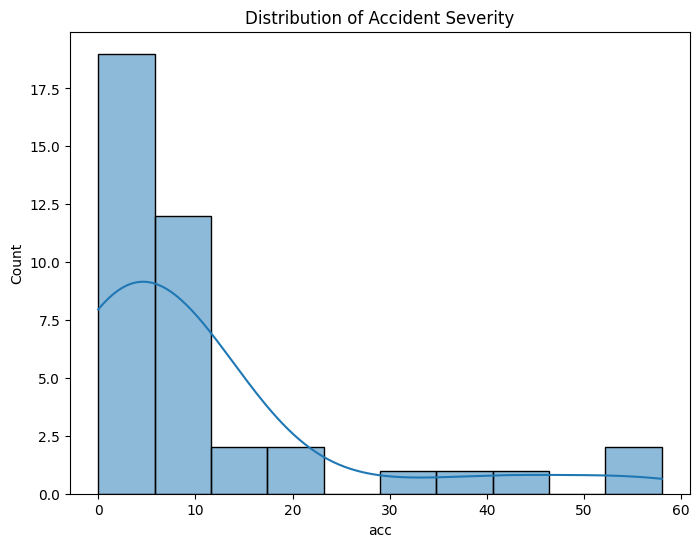

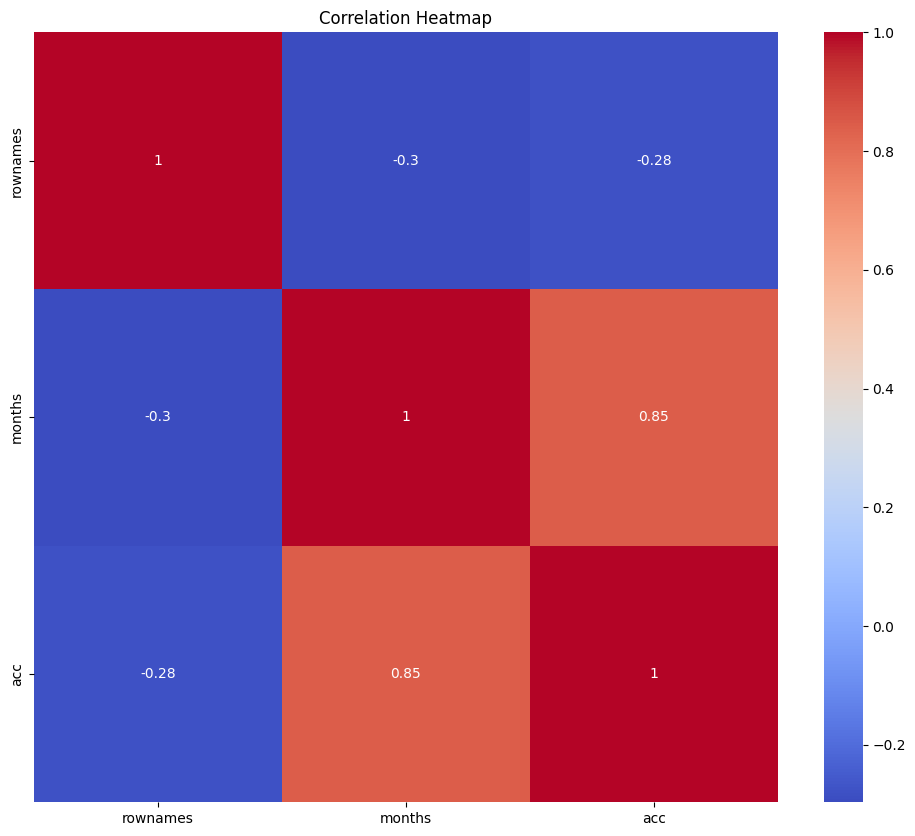

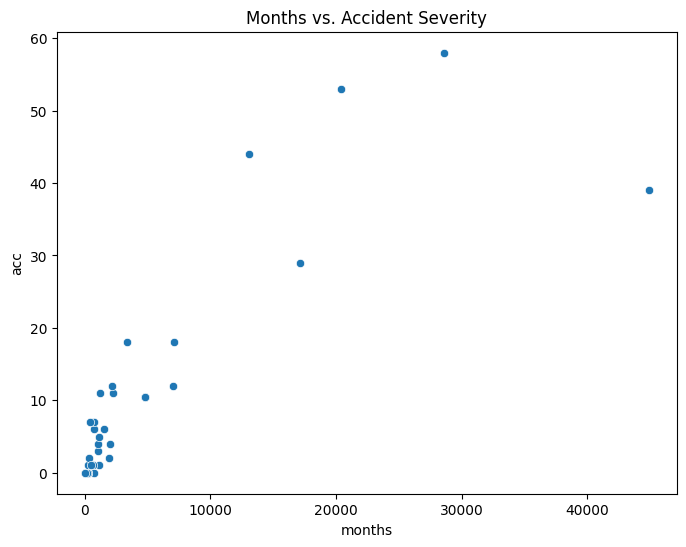

Detected categorical columns: ['type', 'constr', 'operate']
Columns after one-hot encoding: Index(['rownames', 'months', 'acc', 'type_B', 'type_C', 'type_D', 'type_E',
       'constr_C6569', 'constr_C7074', 'constr_C7579', 'operate_O7579'],
      dtype='object')
Mean Squared Error: 6.214827638408304
R² Score: 0.852685567089581
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3db32bdc2cb1d7b041.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the road safety dataset
try:
    from google.colab import files
    uploaded = files.upload()

    # STEP 2: Load CSV into pandas DataFrame
    filename = list(uploaded.keys())[0]  # Get uploaded filename
    df = pd.read_csv(filename)  # Replace 'road_safety_data.csv' with the actual path to your file
except FileNotFoundError:
    print("Error: The file 'road_safety_data.csv' was not found. Please make sure the file exists and the path is correct.")
    exit()

# --- Exploratory Data Analysis (EDA) ---
print("--- Head of the DataFrame ---")
print(df.head())

print("\n--- Description of the DataFrame ---")
print(df.describe())

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Null value imputation function
def impute_nulls(df):
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

df = impute_nulls(df)

# Verify that null values have been imputed
print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())

# --- Data Visualization ---
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['acc'], kde=True)
plt.title('Distribution of Accident Severity')
plt.show()

# Correlation heatmap
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots of features vs. target variable (example)
if 'speed_limit' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='speed_limit', y='acc', data=df)
    plt.title('Speed Limit vs. Accident Severity')
    plt.show()
if 'months' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='months', y='acc', data=df)
    plt.title('Months vs. Accident Severity')
    plt.show()

# --- Feature Engineering and Model Training ---
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Automatically detect categorical columns (object or category dtype)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Detected categorical columns:", categorical_cols)

# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Print columns before dropping the target
print("Columns after one-hot encoding:", df.columns)

# Identify target column
target_col = 'acc'  # <--- CORRECTED TARGET COLUMN NAME
if target_col not in df.columns:
    print(f"Error: Target column '{target_col}' not found in DataFrame.")
    print("Available columns:", df.columns)
    exit()

# Define features (X) and target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# --- Gradio Interface ---
# Prediction function for new inputs
def predict_severity(speed_limit, day_of_week, weather_conditions, light_conditions, road_surface, junction_control):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame([{
        'speed_limit': speed_limit,
        'day_of_week': day_of_week,
        'weather_conditions': weather_conditions,
        'light_conditions': light_conditions,
        'road_surface': road_surface,
        'junction_control': junction_control
    }])

    # Convert categorical features using one-hot encoding (important for consistency)
    for col in categorical_cols:
        if col in input_data.columns:
            input_data = pd.get_dummies(input_data, columns=[col], drop_first=True)

    # Add missing columns with 0 values to match the training data
    missing_cols = set(X.columns) - set(input_data.columns)
    for c in missing_cols:
        input_data[c] = 0

    # Ensure the order of columns is the same as the training data
    input_data = input_data[X.columns]

    # Scale the input features
    scaled_input = scaler.transform(input_data)

    # Predict accident severity
    prediction = model.predict(scaled_input)[0]
    return round(prediction, 2)

# Gradio Interface (adapt the inputs based on your actual features)
inputs = [  # Changed to a list
    gr.Number(label="Speed Limit"),
    gr.Dropdown(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], label="Day of the Week"),
    gr.Dropdown(['Clear', 'Rain', 'Snow', 'Fog'], label="Weather Conditions"),
    gr.Dropdown(['Daylight', 'Darkness'], label="Light Conditions"),
    gr.Dropdown(['Dry', 'Wet', 'Snowy', 'Icy'], label="Road Surface"),
    gr.Dropdown(['Give Way', 'Stop Sign', 'Traffic Signals', 'No Control'], label="Junction Control")
]

output = gr.Number(label="Predicted Accident Severity (1-5)")

# Create an interface using the Gradio library
iface = gr.Interface(
    fn=predict_severity,
    inputs=inputs,
    outputs=output,
    title="Enhancing Road Safety with AI-Driven Traffic Accident Analysis",
    description="Predict accident severity based on road and environmental conditions."
)

# Launch the interface
iface.launch(share=True)